<h2 align="right">Felix Filipi</h2>
<h2 align="right">2301877590 </h2>

<h1 align="center">Computer Vision</h1>
<h2 align="center">Face Recognition</h2>

### 1. We're asked to Find the face image datasets from any available resources  such as Kaggle, Yale, Caltech, etc, and download them. Then, we need to employ the datasets for implementing the face recognition system.

But, instead of downloading the dataset from an online repository, let's try to create our own dataset using OpenCV as input in our model later

<h3> To do this, we just need to open the camera and start saving each picture as our dataset.</h3>

But keep in mind that face recognition means that the model only needs to recognize the face part, so we need to get rid of the other part of the image. To do this, we need to implement face detection and save the detected area in order to get a good dataset for training our model. 

<b>To create our own image dataset here are several steps that need to be done:

1. Import Library
2. Start video capture
3. Apply face detection
4. Crop and get only the face part from the image
5. Save the face part from the image.
6. Stop and close the video capture

<b> Now, let's jump to the code section.

In [1]:
# Importing libraries
import cv2
import os

# Start video capture
cam = cv2.VideoCapture(0)

# Set video height and width
cam.set(3, 640) # set video width
cam.set(4, 480) # set video height

# Load face detection algorithm using haarcascades
face_detector = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

# For each person, we need to enter one numeric face id
face_id = input('\n Enter user id =  ')

# Because to open the camera need a little of time, better to give info for the user
print("\n [WAIT] Look at the camera and wait ...")

# Initialize face count
count = 0

# Camera keep awake until it's done to take 30 picture of face 
# or user interrupt it by pressing ESC
while(True):
    ret, img = cam.read()
    
    # Convert to grayscale, to preprocess the image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Call the face detection function
    faces = face_detector.detectMultiScale(gray, 1.3, 5)
    
    # For x coordinate, y coordinate, width, height in faces variable
    for (x,y,w,h) in faces:
        
        # Rectangle the detected faces with green colour with 2 thickness
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)     
        
        # Count ++ (remember to stop it when the count already 30)
        count += 1
        
        # Save the captured image into the datasets folder
        cv2.imwrite("dataset/User." + str(face_id) + '.' +  
                    str(count) + ".jpg", gray[y:y+h,x:x+w])
        
        # We need to show the image to let us know that face detection work well
        cv2.imshow('image', img)
        
    # The collecting process will stop until the user press ESC or the count already 30
    k = cv2.waitKey(100) & 0xff 
    
    # Press 'ESC' for exiting video
    if k == 27: 
        break
        
    # Take 30 face sample and stop video
    elif count >= 30: 
         break
            
# Tell that the program already stop and need to close camera
print("\n [EXIT PROGRAM]")

# CLose the camera
cam.release()
cv2.destroyAllWindows()


 Enter user id =  1

 [WAIT] Look at the camera and wait ...

 [EXIT PROGRAM]


### I think each code has been described clearly, so we don't need to discuss the code further.

Let's just go to the result, when the code above is already executed, I believe that you will get this kind of window.

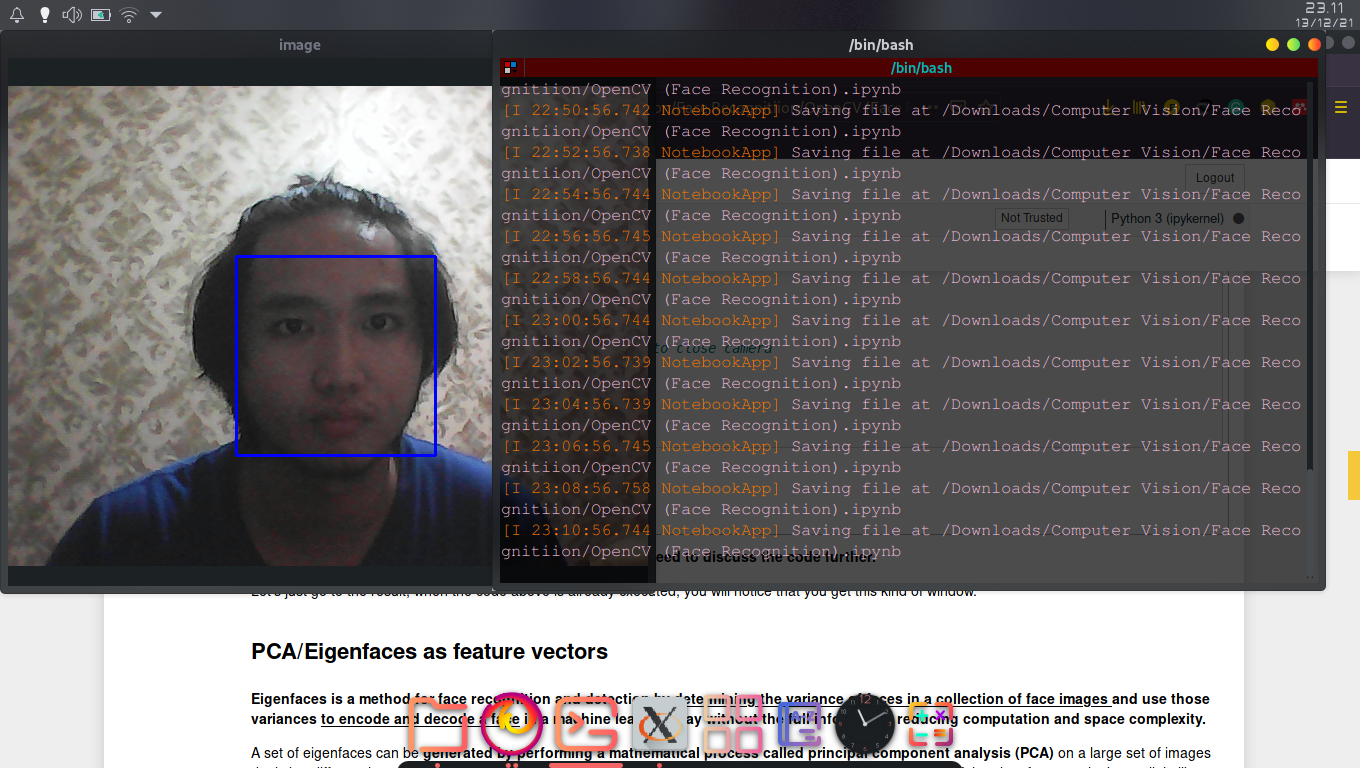

### Now, you just need to wait for it taking your picture and after it takes 30 images of your face, it will stop by itself. And now, you will notice that you get this 30 images in your directory
  
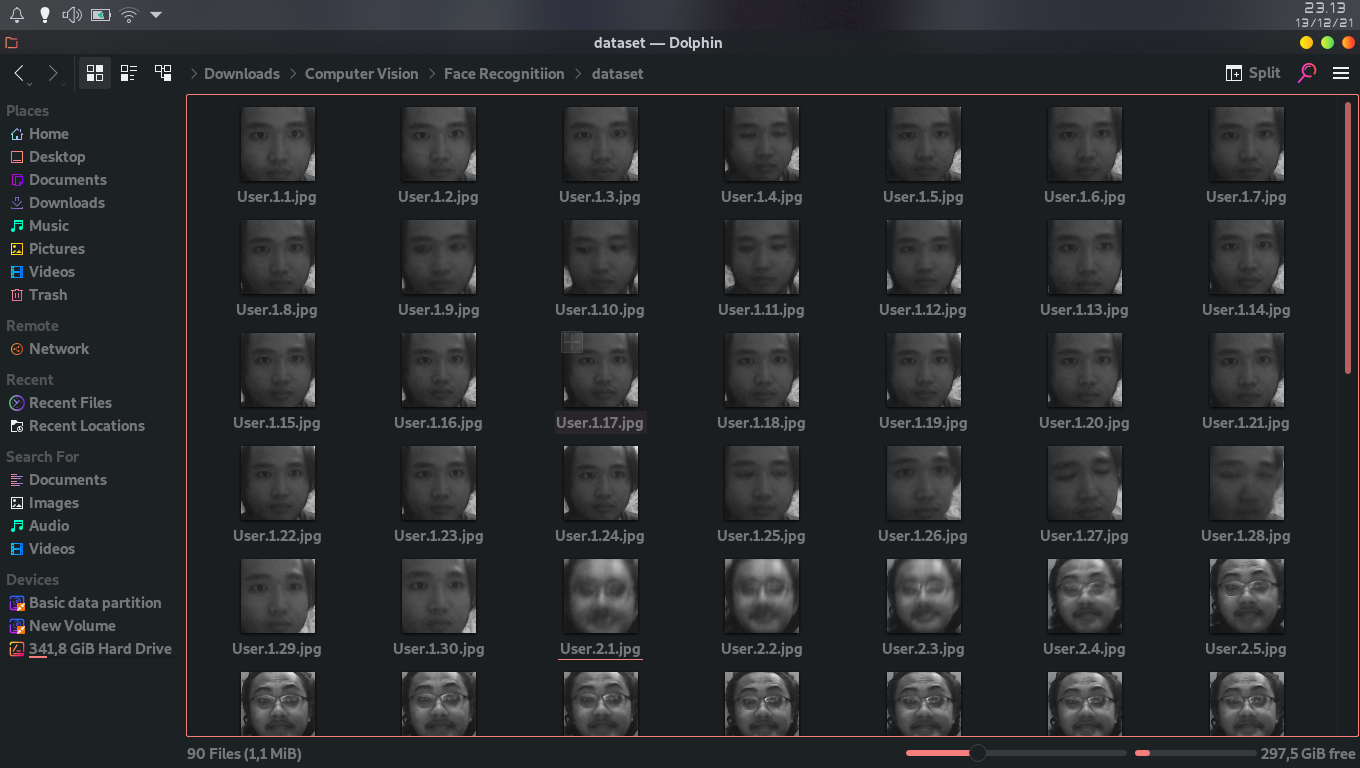

## 2. Now, after we've done collecting our dataset, we need to use PCA/Eigenfaces as features vectors.

#### Now before we are going to the PCA to find the Eigentfaces, we need to load our dataset to get the faces sample and id sample using this code.

In [2]:
# Import another libraries
import numpy as np
from PIL import Image
import os 
import cv2

def getImagesAndLabels(path):
    
    # Define the a list of image path
    imagePaths = [os.path.join(path,f) for f in os.listdir(path)]     
    
    # Initialize empty list
    faceSamples=[]
    ids = []
    
    # Now for each image path we are going to load it using this code 
    for imagePath in imagePaths:
        
        # Open the image from imagepath
        PIL_img = Image.open(imagePath)
        
        # Convert as integer array
        img_numpy = np.asarray(PIL_img,'uint8')
        
        # Resize image (sklearn input need homogeneus input)
        resized_img = cv2.resize(img_numpy,(200,200))
        
        # Split the id from filename
        id = int(os.path.split(imagePath)[-1].split(".")[1])
        
        # Append each face sample to faceSamples list
        faceSamples.append(resized_img)
        
        # Append each id to ids list
        ids.append(id)
        
    return faceSamples,ids

faces,ids = getImagesAndLabels('dataset')

### Now let's try to visualize the loaded image and print its id 

(([], []), ([], []))

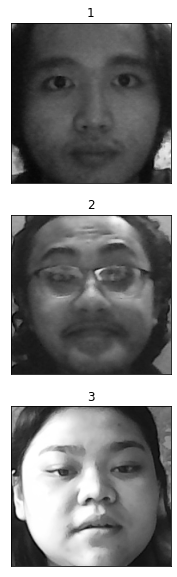

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

# plot first image
plt.subplot(3,1,1)
plt.imshow(faces[60], cmap='gray')
plt.title(ids[60])
plt.xticks([]),plt.yticks([])

# plot second image
plt.subplot(3,1,2)
plt.imshow(faces[0], cmap='gray')
plt.title(ids[0])
plt.xticks([]),plt.yticks([])

# plot third image
plt.subplot(3,1,3)
plt.imshow(faces[35], cmap='gray')
plt.title(ids[35])
plt.xticks([]),plt.yticks([])

### Now, after load and visualize the image, let's try to split the dataset as training and testing, we need to do this because we've asked to check the accuracy later

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces, ids, train_size = 0.8, random_state = 42)

Now, we've already load the dataset, and also already split the dataset. Now we just need to implement the PCA to get the eigenfaces. But, before we go any further we need to understand what's eigenfaces.

### PCA/Eigenfaces as feature vectors

<b> Eigenfaces is a method for face recognition and detection by <u>determining the variance of faces in a collection of face images </u> and use those variances <u>to encode and decode a face</u> in a machine learning way without the full information reducing computation and space complexity. </b>

A set of eigenfaces can be <b>generated by performing a mathematical process called principal component analysis (PCA)</b> on a large set of images depicting different human faces. Other eigenfaces have patterns that are less simple to identify, and the image of the eigenface may look very little like a face.

<b>Example of eigenfaces</b>

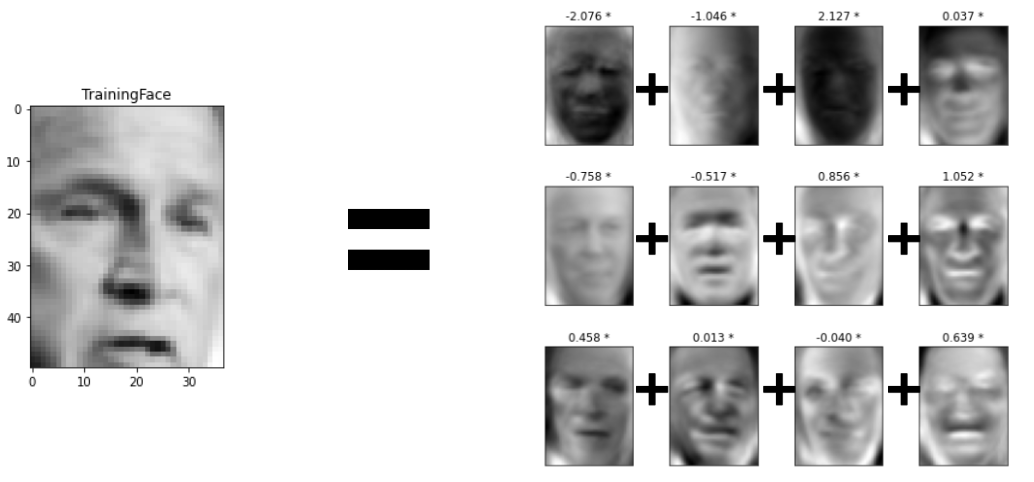

<b> Before we go get the eigenfaces, we need to fix our dataset shape, and this is will be the most complicated section to be done, which is reshaping your array. But don't worry because I've done reshaping the data, so can just code it the same way as I've shown you here, so you won't get any trouble now.

First, we need to convert our dataset to become an array since our dataset is still in the form of a list. To do this, we need to concatenate all arrays inside the list. 

Because we've 72 pictures in the list, then we need to concatenate all arrays in every 72 images and return the result such as.

In [5]:
X_train = np.concatenate(X_train)
X_train.shape

(14400, 200)

<b>Now our dataset has already in the form of array, now the next thing is we need to reshape the image to become 72 x 40000, this means that 72 is the total images, and 40000 is the total array of each picture, if you change the 40000 array become 2D you will get the new array of 200 x 200 which is our image resolution.

In [6]:
X_train = np.reshape(X_train, (72,-1))
X_train.shape

(72, 40000)

<b>Now, after done reshaping your array, we can call the Principal Component Analysis, to get the eigenfaces. To do this, you just need to call the library from scikit-learn like this.

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30, whiten=True)
X_train_pca = pca.fit(X_train,y_train)

<b>Let's print the shape of the PCA result so we can reshape it to become 2D to be plotted.

In [8]:
X_train_pca.mean_.shape

(40000,)

<b> Now, we can see that the PCA result give 40000 shape as the output, now we need to reshape this to become 2D, after that we can see the <b>mean of faces</b> from the train dataset using this code

(([], []), ([], []))

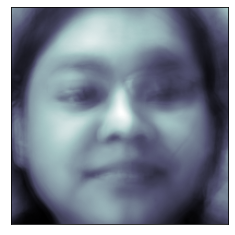

In [9]:
plt.imshow(X_train_pca.mean_.reshape(200,200), cmap=plt.cm.bone)
plt.xticks([]),plt.yticks([])

## This is the mean of eigenfaces from all of the dataset

Now, let's try to print all component shape, this will help us to determine total component to be plotted.

In [10]:
print(pca.components_.shape)

(30, 40000)


We can see that it return 30 components, so we can plot all of this 30 components and return the result like this.

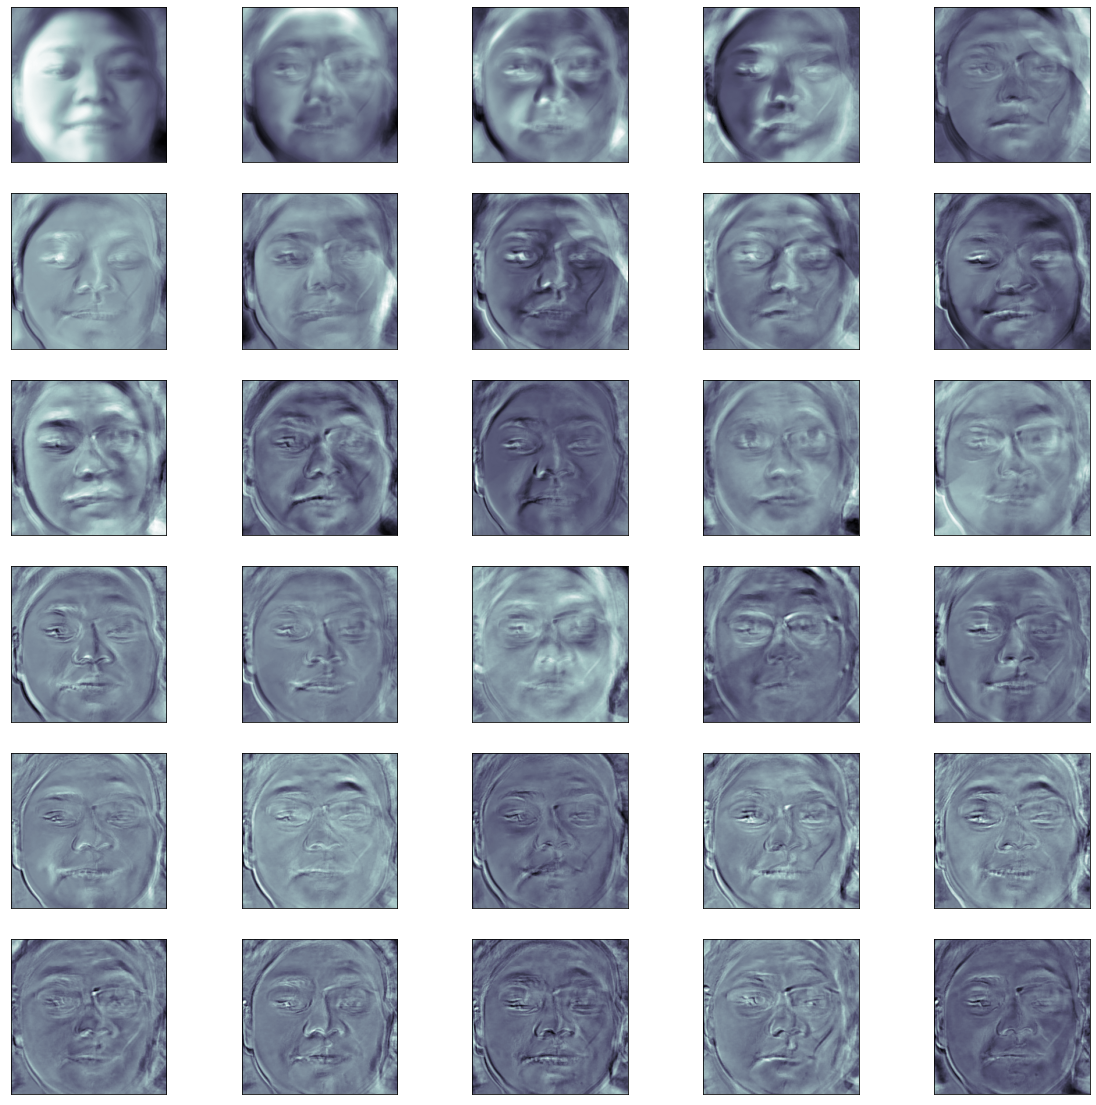

In [11]:
fig = plt.figure(figsize=(20, 20))
for i in range(pca.components_.shape[0]):
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(200,200),
              cmap=plt.cm.bone)

### Now it's time to reshaping the test set as well

In [12]:
len(X_test)

18

In [13]:
# Reshaping the test set
X_test = np.concatenate(X_test)
X_test = np.reshape(X_test, (18,-1))

### Now we've already done plotting the eigenface, now let's transform it to be used in the SVM

In [14]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(72, 30)
(18, 30)


### 3. Use SVM as a classifier.

We've already done getting the eigenfaces, doing pca and trasnform it, now it's time to implement it on SVM classifier

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

cls = GridSearchCV(SVC(), param_grid = param_grid)
cls.fit(X_train_pca, y_train)
print("Best parameter = ", cls.best_estimator_)

Best parameter =  SVC(C=10, gamma=0.001)


### Predict the test set

In [16]:
prediction = cls.predict(X_test_pca)

### Print the prediction, and the real label

In [17]:
print('The prediction result = ', prediction)
print('The real person result = ', y_test)

The prediction result =  [3 2 3 1 2 2 3 1 2 3 1 3 3 1 2 2 3 2]
The real person result =  [3, 2, 3, 1, 2, 2, 3, 1, 2, 3, 1, 3, 3, 1, 2, 2, 3, 2]


### Print performance report

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(prediction, y_test))
print(confusion_matrix(prediction, y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[4 0 0]
 [0 7 0]
 [0 0 7]]


## As we can see here, the model using SVM able to predict the result 100% withhout any miss or any False Acceptance Rate (FAR) or False Rejected Rate (FRR)

## 4. You may check also the accuracy of using k-Nearest Neighbors compared to SVM.

Now let's try to implement the knn algorithm using sklearn library

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [20]:
# Call the knn function to predict the test set
knn_prediction = knn.predict(X_test_pca)

# Print the prediction result and its true label
print(f"KNN prediction = {knn_prediction}")
print(f"True label = {y_test}")

KNN prediction = [3 2 1 1 2 2 1 1 2 1 1 1 1 1 2 2 1 2]
True label = [3, 2, 3, 1, 2, 2, 3, 1, 2, 3, 1, 3, 3, 1, 2, 2, 3, 2]


# KNN algorithm evaluation

In [21]:
print(classification_report(knn_prediction, y_test))
print(confusion_matrix(knn_prediction, y_test))

              precision    recall  f1-score   support

           1       1.00      0.40      0.57        10
           2       1.00      1.00      1.00         7
           3       0.14      1.00      0.25         1

    accuracy                           0.67        18
   macro avg       0.71      0.80      0.61        18
weighted avg       0.95      0.67      0.72        18

[[4 0 6]
 [0 7 0]
 [0 0 1]]


## As we can see here, the performance of KNN algorithm work inferior compared to SVM, and only return 67% of accuracy, meanwhile SVM return 100% accuracy. This result means that this lazy learner won't able to win againts SVM, so as the conclusion we need to use SVM instead of KNN